## Hardware Incident Analysis During Specific Time Windows (Flag 56)

### Dataset Description
The dataset comprises 600 entries simulating ServiceNow incidents table, detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like description, and priority. It captures incident management activities with fields like 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories.

### Your Task
**Goal**: Analyze the hardware-related incidents during an identified time window to pinpoint potential hiccups that could be causing any anomalies.

**Role**: DT Asset Manager

**Difficulty**: 4 out of 5. This task involves complex data analysis to correlate the timing of incidents with potential internal changes or external events. Also deserves skills on performing linear regression.

**Category**: Incident Management



### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell imports the dataset for our analysis, it is stored as a CSV file "flag-9.csv" and loads it into a DataFrame. The process involves reading the data from the specified file path and include checking the first few rows to confirm accurate loading.


In [2]:
dataset_path = "csvs/flag-56.csv"
df = pd.read_csv(dataset_path)
df.head()

,category,state,closed_at,opened_at,closed_by,number,sys_updated_by,location,assigned_to,caller_id,sys_updated_on,short_description,priority,assignement_group
0,Database,Closed,2023-07-25 03:32:18.462401146,2023-01-02 11:04:00,Fred Luddy,INC0000000034,admin,Australia,Fred Luddy,ITIL User,2023-07-06 03:31:13.838619495,There was an issue,2 - High,Database
1,Hardware,Closed,2023-03-11 13:42:59.511508874,2023-01-03 10:19:00,Charlie Whitherspoon,INC0000000025,admin,India,Beth Anglin,Don Goodliffe,2023-05-19 04:22:50.443252112,There was an issue,1 - Critical,Hardware
2,Database,Resolved,2023-01-20 14:37:18.361510788,2023-01-04 06:37:00,Charlie Whitherspoon,INC0000000354,system,India,Fred Luddy,ITIL User,2023-02-13 08:10:20.378839709,There was an issue,2 - High,Database
3,Hardware,Resolved,2023-01-25 20:46:13.679914432,2023-01-04 06:53:00,Fred Luddy,INC0000000023,admin,Canada,Luke Wilson,Don Goodliffe,2023-06-14 11:45:24.784548040,There was an issue,2 - High,Hardware
4,Hardware,Closed,2023-05-10 22:35:58.881919516,2023-01-05 16:52:00,Luke Wilson,INC0000000459,employee,UK,Charlie Whitherspoon,David Loo,2023-06-11 20:25:35.094482408,There was an issue,2 - High,Hardware


### **Question 1**: What is the trend in the time to resolution (TTR) for incidents across categories over the timeline?

#### Plot Time to Resolution (TTR) over time for different categories
This cell creates line plot to visualize the trend in Time to Resolution (TTR) for incidents across different categories over time. By tracking how quickly incidents are resolved within each category it provides insights into efficiencies of incident handling and helps identify if certain categories consistently experience longer or shorter resolution times

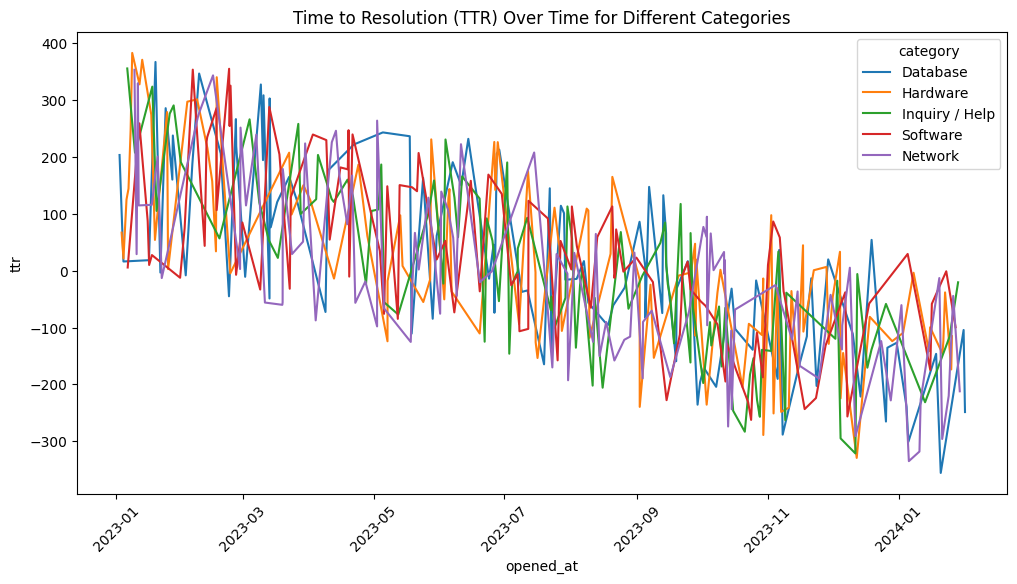

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Create a new column 'month_year' to make the plot more readable
# df['month_year'] = df['opened_at'].dt.to_period('M')
df["ttr"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400
# Convert 'ttr' column to numeric and handle errors
df["ttr"] = pd.to_numeric(df["ttr"], errors="coerce")

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="opened_at", y="ttr", hue="category")
plt.title("Time to Resolution (TTR) Over Time for Different Categories")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "There is a uniform decreasing trend of TTR for all category incidents over time.",
    "insight_value": {"x_val": "Anomaly Periods", "y_val": "No anomaly detected"},
    "plot": {
        "plot_type": "line",
        "title": "TTR over time for different categories of Incidents",
        "x_axis": {
            "name": "Time",
            "value": "Time periods",
            "description": "This represents the specific time  periods of interest."
        },
        "y_axis": {
            "name": "Time to Resolution",
            "value": "Dynamic based on data",
            "description": "This represents the time taken to resolve incidents, grouped across category during the  period."
        },
        "description": "The line graph demonstrates an uniform trend in the TTR for incidents across all categories. The TTR is decreasing over time, indicating an improvement in service efficiency."
    },
    "question": "What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?",
    "actionable_insight": "The decreasing trend in TTR for Hardware incidents indicates an improvement in service efficiency. This could be due to the implementation of new tools or processes. It is recommended to further investigate the factors contributing to this improvement and consider implementing similar strategies for other categories to enhance overall service delivery."
}

{'data_type': 'descriptive',
 'insight': 'There is a uniform decreasing trend of TTR for all category incidents over time.',
 'insight_value': {'x_val': 'Anomaly Periods', 'y_val': 'No anomaly detected'},
 'plot': {'plot_type': 'line',
  'title': 'TTR over time for different categories of Incidents',
  'x_axis': {'name': 'Time',
   'value': 'Time periods',
   'description': 'This represents the specific time  periods of interest.'},
  'y_axis': {'name': 'Time to Resolution',
   'value': 'Dynamic based on data',
   'description': 'This represents the time taken to resolve incidents, grouped across category during the  period.'},
  'description': 'The line graph demonstrates an uniform trend in the TTR for incidents across all categories. The TTR is decreasing over time, indicating an improvement in service efficiency.'},
 'question': 'What is the trend in the time to resolution (TTR) for Hardware incidents, especially during the identified anomaly periods?',
 'actionable_insight': 'The 

### **Question 2: What is the overall distribution of incidents across categories?**

#### Plot overall number of incidents by each category
This cell creates a bar plot to visualize the overall distribution of incidents across different categories, providing insights into which categories see the most activity and might require additional resources or attention. 

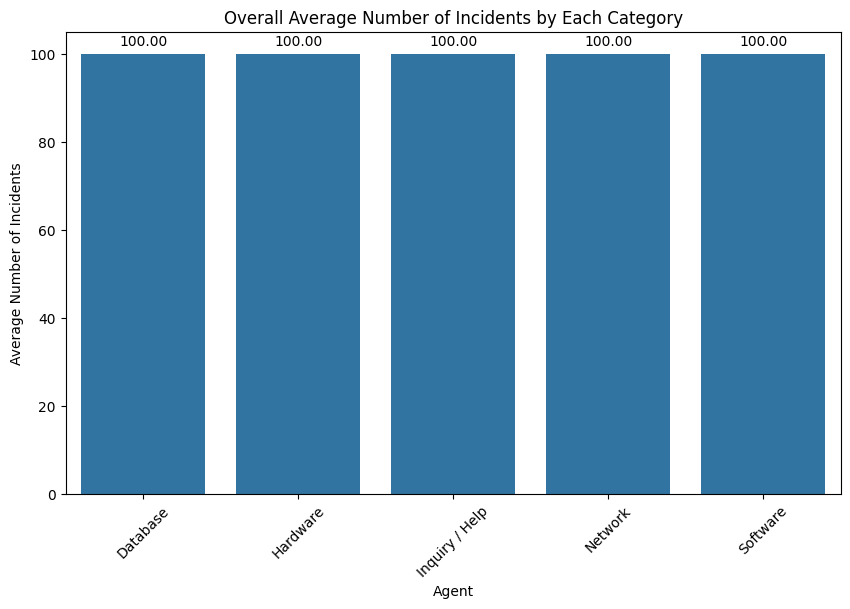

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and has the necessary columns
df["opened_at"] = pd.to_datetime(df["opened_at"])

# Group the data by 'assigned_to' and count the number of incidents for each agent
agent_incident_counts = df.groupby('category').size()

# Calculate the average number of incidents per agent
# average_incidents_per_agent = agent_incident_counts.mean()

# Create a DataFrame for plotting
agent_average_df = pd.DataFrame({
    'Agent': agent_incident_counts.index,
    'Average Incidents': agent_incident_counts
})

# Plotting the average number of incidents per agent
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Agent', y='Average Incidents', data=agent_average_df)
plt.title('Overall Average Number of Incidents by Each Category')
plt.ylabel('Average Number of Incidents')
plt.xlabel('Agent')
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{"data_type":"descriptive",
"insight": "All categories have the same number of incidents on average.",
"insight_value":{"x_val": "All categories", "y_val": 100},
"plot": {
    "plot_type": "histogram",
    "title": "Incidents by Category",
    "x_axis": {
        "name": "Category",
        "value": ["Hardware", "Software", "Network", "Inquiry / Help", "Database"],
        "description": "This represents the different categories of incidents."
    },
    "y_axis": {
        "name": "Number of Incidents",
        "value": [100, 100, 100, 100, 100],
        "description": "This represents the number of incidents in each category."
    },
    "description": "The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The categories have an equal number of incidents on average."
},
"question": "What is the distribution of incidents across all categories?",
"actionable_insight": "The equal distribution of incidents across all categories indicates that the workload is balanced among agents. This suggests that the incident management system is effectively routing incidents to the appropriate categories and agents. It is recommended to continue monitoring the distribution to ensure that the workload remains balanced and to identify any potential bottlenecks or inefficiencies in the incident management process."
}

{'data_type': 'descriptive',
 'insight': 'All categories have the same number of incidents on average.',
 'insight_value': {'x_val': 'All categories', 'y_val': 100},
 'plot': {'plot_type': 'histogram',
  'title': 'Incidents by Category',
  'x_axis': {'name': 'Category',
   'value': ['Hardware', 'Software', 'Network', 'Inquiry / Help', 'Database'],
   'description': 'This represents the different categories of incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [100, 100, 100, 100, 100],
   'description': 'This represents the number of incidents in each category.'},
  'description': 'The histogram displays the distribution of incidents across different categories. Each bar represents a category and the length of the bar corresponds to the number of incidents in that category. The values are annotated on each bar. The categories have an equal number of incidents on average.'},
 'question': 'What is the distribution of incidents across all categories?',
 'actionable_insi


### **Question 3**: How are incidents distributed across different categories over time?

#### Plot number of incidents created over time by category
This cell creates a count plot to visualize how incidents are distributed across different categories over time, providing insights into trends or any significant changes in the types of incidents reported. By tracking the distribution of incidents on monthly basis, the plot helps identify how demands change/evolve and which categories may require more attention at different times. 

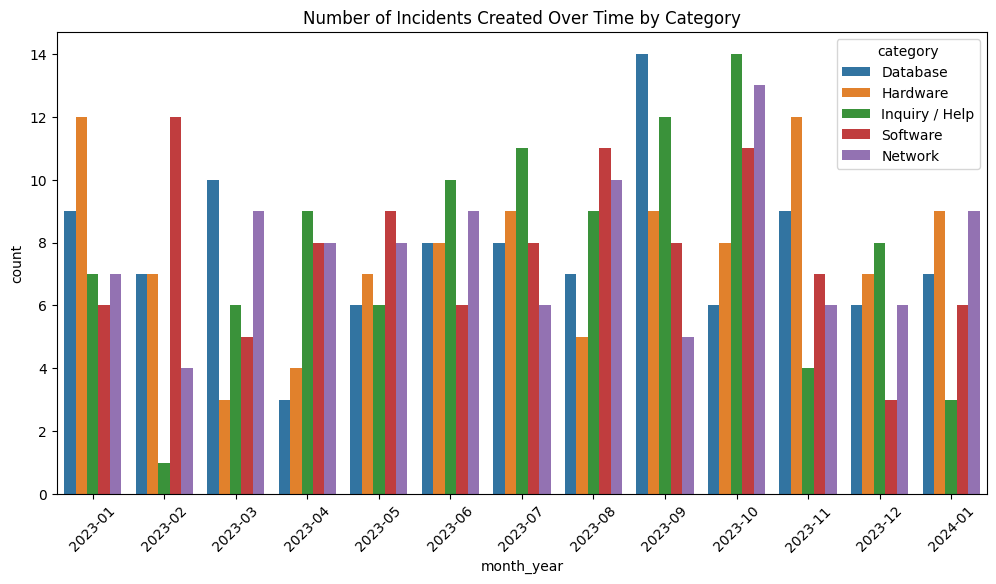

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Put the data into a DataFrame

# Sort the DataFrame by the opened_at column
df = df.sort_values("opened_at")
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])
# Create a new column 'month_year' to make the plot more readable
df["month_year"] = df["opened_at"].dt.to_period("M")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="month_year", hue="category")
plt.title("Number of Incidents Created Over Time by Category")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There are fluctuations in incident frequencies across categories, with slightly higher activity in September and October.",
    "insight_value": {"x_val": "Time", "y_val": "Incident Count"},
    "plot": {
        "plot_type": "line",
        "title": "Incident Distribution Over Time by Category",
        "x_axis": {
            "name": "Time",
            "value": "2023-01-01 to 2024-02-01",
            "description": "This represents the timeline of the data collected."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": "Dynamic based on data",
            "description": "This represents the number of incidents occurring over time for each category."
        },
        "description": "The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the months of September and October."
    },
    "question": "How are incidents distributed across different categories over time?",
    "actionable_insight": "The fluctuations in incident frequencies across categories suggest varying levels of activity and demand for support services. It is recommended to investigate the factors contributing to the increased activity in September and October to better allocate resources and optimize service delivery during peak periods."
}

{'data_type': 'descriptive',
 'insight': 'There are fluctuations in incident frequencies across categories, with slightly higher activity in September and October.',
 'insight_value': {'x_val': 'Time', 'y_val': 'Incident Count'},
 'plot': {'plot_type': 'line',
  'title': 'Incident Distribution Over Time by Category',
  'x_axis': {'name': 'Time',
   'value': '2023-01-01 to 2024-02-01',
   'description': 'This represents the timeline of the data collected.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': 'Dynamic based on data',
   'description': 'This represents the number of incidents occurring over time for each category.'},
  'description': 'The line graph shows the trend of incidents over time, divided by categories. It highlights periods with unusually high activity, particularly in the months of September and October.'},
 'question': 'How are incidents distributed across different categories over time?',
 'actionable_insight': 'The fluctuations in incident frequencies ac

### **Question 4**: Could we forecast these high-activity periods in the future?

#### Plot projected trends in incidents.

This cell uses linear regression to predict future trends in the number of hardware incidents based on historical data, providing insights into potential future high-activity periods. By modeling and projecting these trends, the plot helps anticipate when spikes in hardware incidents might occur

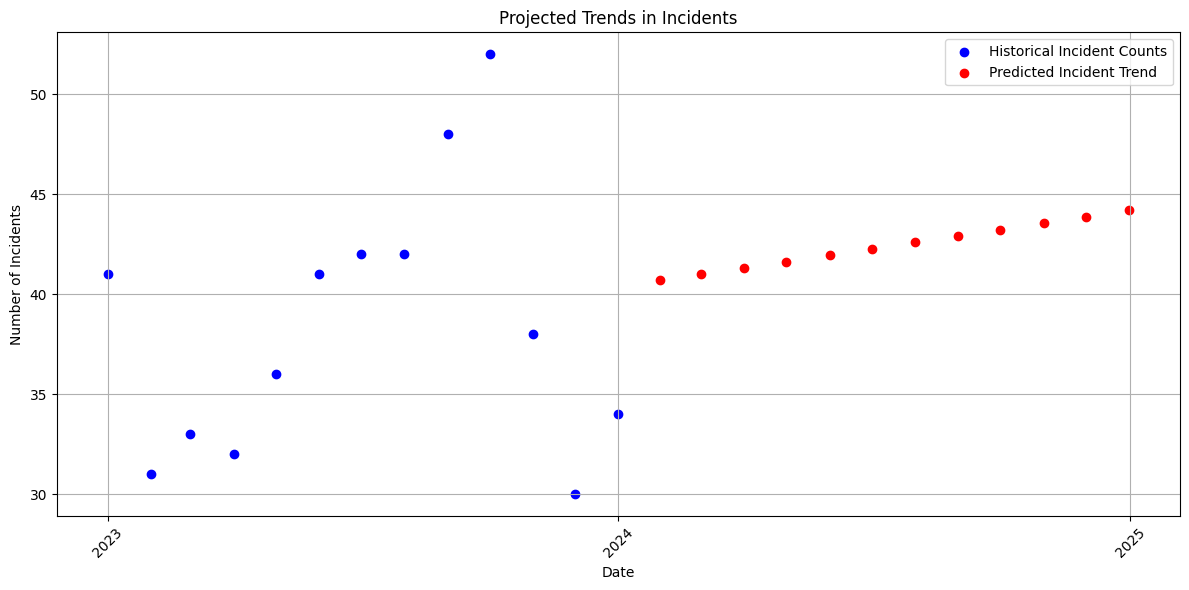

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-56.csv"
# Load the dataset
df = pd.read_csv(dataset_path)
df['opened_at'] = pd.to_datetime(df['opened_at'])

# Count the number of hardware incidents per month
incident_counts = df.groupby(df['opened_at'].dt.to_period("M")).size().reset_index(name='counts')
incident_counts['date_ordinal'] = incident_counts['opened_at'].dt.start_time.apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = incident_counts['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = incident_counts['counts'].values  # Target variable: number of incidents

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_dates = pd.date_range(start=incident_counts['opened_at'].max().to_timestamp(), periods=12, freq='M')  # Predicting for the next 10 years, monthly
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(incident_counts['opened_at'].dt.start_time, y, color='blue', label='Historical Incident Counts')
plt.scatter(future_dates, future_preds, color='red', label='Predicted Incident Trend')
plt.title('Projected Trends in Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [10]:
{
    "data_type": "predictive",
    "insight": "There is no trend detected in the number of hardware incidents over time.",
    "insight_value": {
        "trend": "No trend detected",
        "prediction": "The linear regression model predicts a linear increase however, the prediction is not reliable due to the lack of trend in the historical data."
    },
    "description": "The predictive analysis using a linear regression model on historical hardware incident data indicates a continued linear increase in the number of such incidents over time; however, the prediction may not be reliable due to the absence of a clear trend in the historical data.",
    "actionable_insight": "Given the lack of a clear trend in the historical data, it is recommended to monitor hardware incidents closely and reassess the predictive model as more data becomes available. Additionally, further analysis and consideration of other factors may be necessary to improve the accuracy of future predictions."
}

{'data_type': 'predictive',
 'insight': 'There is no trend detected in the number of hardware incidents over time.',
 'insight_value': {'trend': 'No trend detected',
  'prediction': 'The linear regression model predicts a linear increase however, the prediction is not reliable due to the lack of trend in the historical data.'},
 'description': 'The predictive analysis using a linear regression model on historical hardware incident data indicates a continued linear increase in the number of such incidents over time; however, the prediction may not be reliable due to the absence of a clear trend in the historical data.',
 'actionable_insight': 'Given the lack of a clear trend in the historical data, it is recommended to monitor hardware incidents closely and reassess the predictive model as more data becomes available. Additionally, further analysis and consideration of other factors may be necessary to improve the accuracy of future predictions.'}

### Summary of Findings (Flag 56)

1. **No Trend in Frequency of Incidents**: There is no clear trend in the frequency of hardware incidents over time, indicating that the number of incidents remains relatively stable across different categories.
2. **Occurance and Possible Causes**: The elevated frequency occurs particualy from 2023-09 to 2023-10. This could be linked to various factors such as new hardware deployments or changes in usage patterns. 
3. **Need for Detailed Investigation**: To address and mitigate the anomaly effectively, a thorough investigation into the specific causes of the increased frequency of hardware incidents is essential.